In this file I create a MLP that can say wether I (Fermín Moreno) like a song or not.
The MLP is trained with a small dataset taken from my saved tracks, and a couple of playlists I'm not a particular fan of.

Libraries needed for this project

In [7]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

Quick view of the (small) dataset

In [8]:
data = pandas.read_csv('train_data.csv')
test_data = pandas.read_csv('test_data.csv')
neg_test_data = pandas.read_csv('neg_test_data.csv')
data.head(n=20)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,liked
0,0.8220,0.668,0.440,0.000004,0.0901,-10.607,0.0801,1.0
1,0.6760,0.724,0.304,0.000000,0.1040,-11.462,0.2300,1.0
2,0.1250,0.549,0.414,0.000000,0.1120,-9.550,0.0556,1.0
3,0.3540,0.680,0.563,0.000000,0.1360,-5.843,0.0454,1.0
4,0.0212,0.604,0.894,0.000000,0.0299,-5.000,0.0370,1.0
5,0.0759,0.391,0.808,0.000000,0.1490,-6.209,0.0892,1.0
6,0.1560,0.429,0.594,0.000005,0.1000,-6.251,0.0277,1.0
7,0.0267,0.708,0.772,0.000000,0.4670,-4.264,0.0322,1.0
8,0.0145,0.599,0.732,0.000467,0.1430,-6.843,0.0262,1.0
9,0.1570,0.597,0.932,0.000000,0.3400,-2.463,0.0411,1.0


In [4]:
data.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,liked
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,0.211420,0.662460,0.693733,0.029096,0.177555,-5.671547,0.096966,0.528021
std,0.226436,0.130837,0.166363,0.131380,0.127752,2.357685,0.078822,0.416900
min,0.001510,0.321000,0.104000,0.000000,0.029900,-14.080000,0.026200,0.000000
25%,0.032300,0.579000,0.575000,0.000000,0.095000,-7.277000,0.042800,0.000000
50%,0.125000,0.680000,0.712000,0.000000,0.125000,-5.266000,0.067000,0.521082
75%,0.317000,0.752000,0.833000,0.000321,0.231000,-3.915000,0.120000,1.000000
max,0.979000,0.933000,0.960000,0.922000,0.776000,-1.211000,0.463000,1.000000


There seems to be a barely noticeable trend. I seem to prefer a bit more acoustic songs

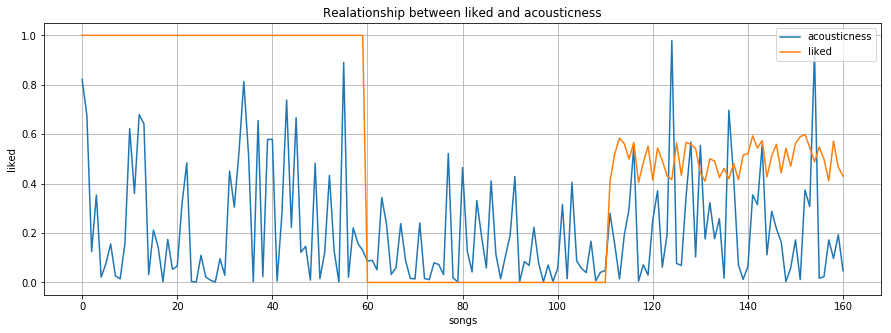

In [9]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(data['acousticness'])
ax.plot(data['liked'])
ax.set(xlabel='songs', ylabel='liked', title='Realationship between liked and acousticness')
ax.grid()
ax.legend(['acousticness', 'liked'], loc='upper right')

plt.show()

Danceability doesn't seem to have a very strong relationship on wether I like a song or not, but the songs I prefer seem to be on the lower side, compared to the songs I dislike.

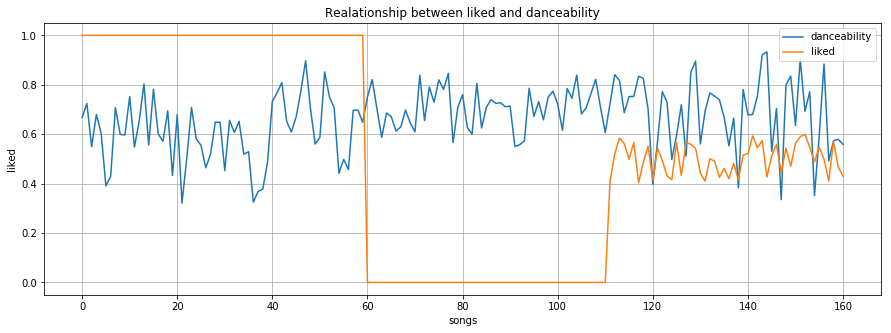

In [10]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(data['danceability'])
ax.plot(data['liked'])
ax.set(xlabel='songs', ylabel='liked', title='Realationship between liked and danceability')
ax.grid()
ax.legend(['danceability', 'liked'], loc='upper right')

plt.show()

The songs I'm not a particular fan of seem to be a bit more energetic than the ones I like.

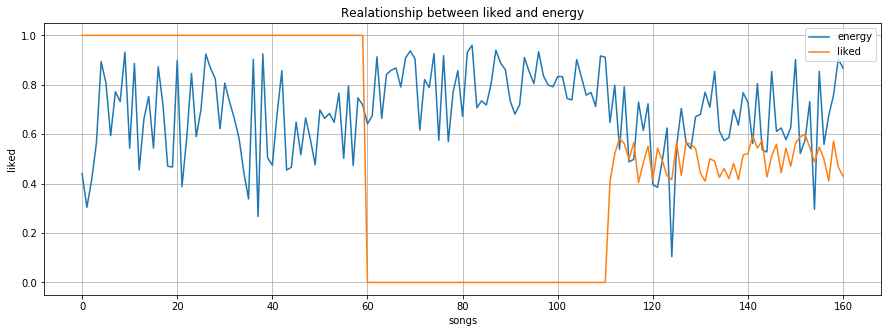

In [11]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(data['energy'])
ax.plot(data['liked'])
ax.set(xlabel='songs', ylabel='liked', title='Realationship between liked and energy')
ax.grid()
ax.legend(['energy', 'liked'], loc='upper right')

plt.show()

Bingo! I seem to be a fan of instrumental songs.
Just to clarify, this is what instrumentalness means (taken from the spotify API): Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

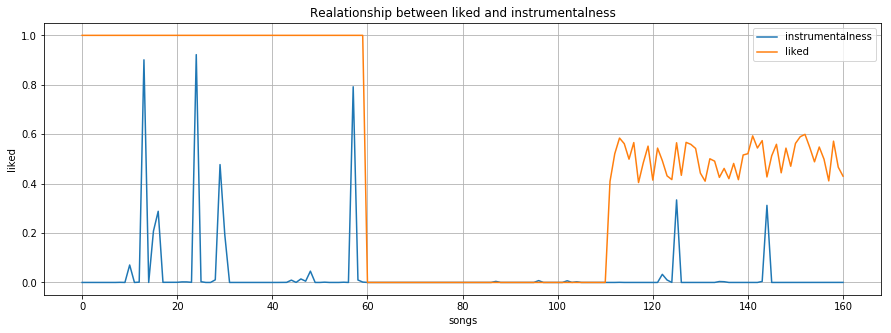

In [12]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(data['instrumentalness'])
ax.plot(data['liked'])
ax.set(xlabel='songs', ylabel='liked', title='Realationship between liked and instrumentalness')
ax.grid()
ax.legend(['instrumentalness', 'liked'], loc='upper right')

plt.show()

The songs I like are mostly liveless (hehe), but I also like some lively songs. I seem to prefer songs with a low level of liveliness though.

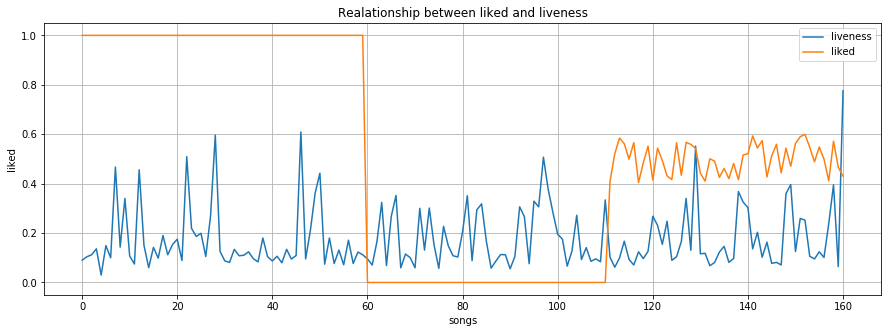

In [13]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(data['liveness'])
ax.plot(data['liked'])
ax.set(xlabel='songs', ylabel='liked', title='Realationship between liked and liveness')
ax.grid()
ax.legend(['liveness', 'liked'], loc='upper right')

plt.show()

The loudness column seems a bit useless, however, I will still use it for the MLP training.

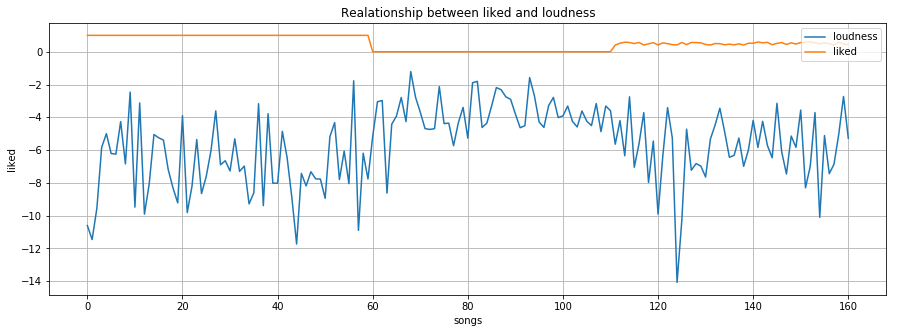

In [14]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(data['loudness'])
ax.plot(data['liked'])
ax.set(xlabel='songs', ylabel='liked', title='Realationship between liked and loudness')
ax.grid()
ax.legend(['loudness', 'liked'], loc='upper right')

plt.show()

Speechiness also seems to be a little bit lower for the songs I prefer.

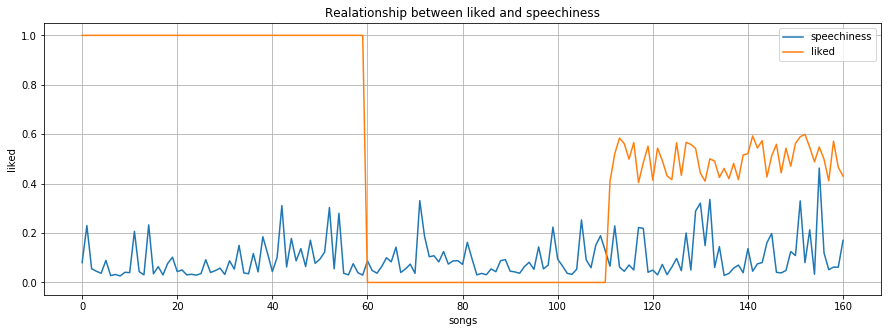

In [15]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(data['speechiness'])
ax.plot(data['liked'])
ax.set(xlabel='songs', ylabel='liked', title='Realationship between liked and speechiness')
ax.grid()
ax.legend(['speechiness', 'liked'], loc='upper right')

plt.show()

In [16]:
numpy_data_test = np.asarray(test_data.drop(['speechiness'], axis=1))
numpy_neg_data_test = np.asarray(neg_test_data.drop(['speechiness'], axis=1))

[[23  3]
 [ 6  9]]


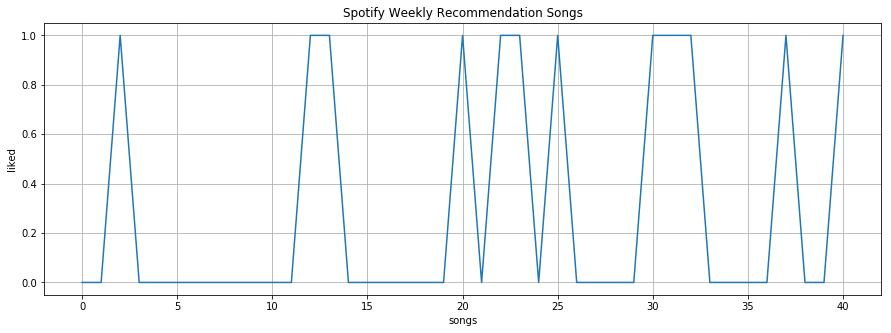

In [20]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)

numpy_data_train_x = np.asarray(data.drop(['liked', 'speechiness'], axis=1))
dt = np.dtype(np.int32)
numpy_data_train_y = np.asarray(data['liked'], dtype=dt)

X_train, X_test, y_train, y_test = train_test_split(numpy_data_train_x, numpy_data_train_y, test_size = 0.25, random_state = 0)
mlpc.fit(X_train, y_train)
prediction = mlpc.predict(X_test)
cm = confusion_matrix(y_test, prediction)
print(cm)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(prediction)
ax.set(xlabel='songs', ylabel='liked', title='Spotify Weekly Recommendation Songs')
ax.grid()
plt.show()

In [9]:
print("Number of liked songs:", np.count_nonzero(prediction))

Number of liked songs: 24


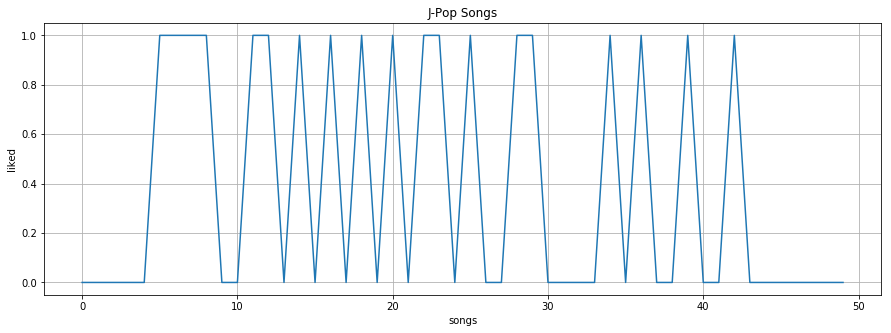

In [10]:
neg_prediction = mlpc.predict(numpy_neg_data_test)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(neg_prediction)
ax.set(xlabel='songs', ylabel='liked', title='J-Pop Songs')
ax.grid()
plt.show()

In [14]:
print("Number of liked songs:", np.count_nonzero(neg_prediction))

Number of liked songs: 19


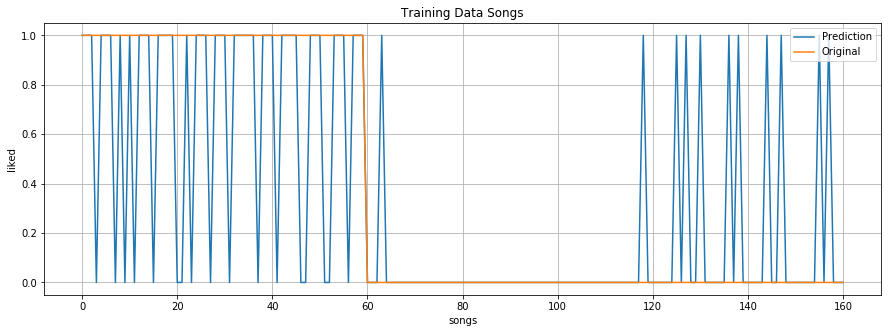

In [12]:
test_prediction = mlpc.predict(numpy_data_train_x)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(test_prediction)
ax.plot(numpy_data_train_y)
ax.set(xlabel='songs', ylabel='liked', title='Training Data Songs')
ax.legend(['Prediction', 'Original'], loc='upper right')
ax.grid()
plt.show()

In [13]:
print("Number of liked songs (prediction):", np.count_nonzero(test_prediction))
print("Number of liked songs (original):", np.count_nonzero(numpy_data_train_y))

Number of liked songs (prediction): 54
Number of liked songs (original): 60
